In [5]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [6]:
train_features = np.load('C:\\Users\\atr\\Desktop\\save\\um1_train_features.npy')
train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\um1_train_labels.npy')
train_features = np.squeeze(train_features)
print("train_features.shape:",train_features.shape)
print("train_labels.shape", train_labels.shape)

test_features = np.load('C:\\Users\\atr\\Desktop\\save\\um1_test_features.npy')
test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\um1_test_labels.npy')
test_features = np.squeeze(test_features)
print("test_features.shape:",test_features.shape)
print("test_labels.shape", test_labels.shape)

train_features.shape: (25456, 84)
train_labels.shape (25456, 1)
test_features.shape: (5920, 84)
test_labels.shape (5920, 1)


In [7]:
from sklearn import svm
from sklearn.feature_selection import RFECV
classifier = svm.SVC(kernel="linear")
selector = RFECV(classifier, step=1)
selector = selector.fit(train_features, train_labels)
selector.score(test_features,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7283783783783784

In [28]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(train_features, train_labels)
classifier.score(test_features,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7430743243243243

In [29]:
#使用pca降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(train_features)
pca_test = pca.fit_transform(test_features)
print("new_train.shape:", pca_train.shape)
print("new_test.shape:", pca_test.shape)

new_train.shape: (25456, 2)
new_test.shape: (5920, 2)


In [30]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(pca_train, train_labels)
classifier.score(pca_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7518581081081082

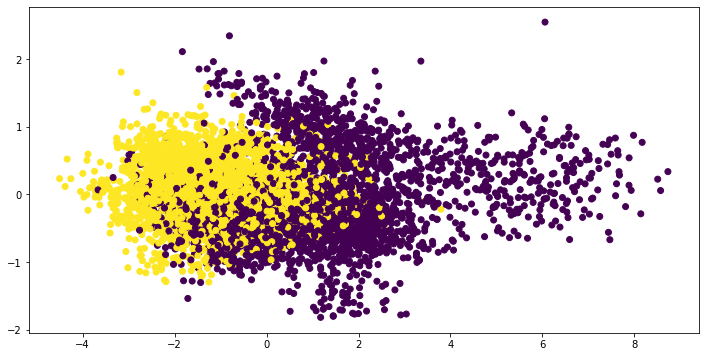

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=np.squeeze(test_labels))

In [32]:
#使用tsne降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(train_features)
tsne_test = tsne.fit_transform(test_features)

In [33]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(tsne_train, train_labels)
classifier.score(tsne_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5957770270270271

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso           # 此处以L1正则化的线性模型Lasso为例
lasso = Lasso(alpha=0.01).fit(train_features, train_labels) 
model = SelectFromModel(lasso, prefit=True)

train_new = model.transform(train_features)
test_new = model.transform(test_features)

print("train_new.shape:", train_new.shape)
print("test_new.shape:", test_new.shape)

train_new.shape: (25456, 4)
test_new.shape: (5920, 4)


In [35]:
from sklearn import svm
classifier = svm.SVC(gamma='auto')
classifier.fit(train_new, train_labels)
classifier.score(test_new,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7464527027027027